In [1]:
#Connect to server & import libraries for EDA.
import mysql.connector
import pandas as pd
con=mysql.connector.connect(host="localhost",
                           port=3306,
                           user="root",
                           password="*****",
                           database="studdb")

In [2]:
df=pd.read_sql_query("select * from studmarks", con)
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       10 non-null     object
 1   Gender     10 non-null     object
 2   DOB        10 non-null     object
 3   Maths      10 non-null     int64 
 4   Physics    10 non-null     int64 
 5   Chemistry  10 non-null     int64 
 6   English    10 non-null     int64 
 7   Biology    10 non-null     int64 
 8   Economics  10 non-null     int64 
 9   History    10 non-null     int64 
 10  Civics     10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [4]:
def Q(sql):
    res=pd.read_sql_query(sql,con)
    return(res)

In [5]:
subjects=df.columns[3:]
subjects

Index(['Maths', 'Physics', 'Chemistry', 'English', 'Biology', 'Economics',
       'History', 'Civics'],
      dtype='object')

In [6]:
res = Q("SELECT Name,Maths FROM studmarks ORDER BY Maths DESC ")
res

,Name,Maths
0,Mukesh,96
1,Jessica,78
2,Suresh,75
3,Jennifer,58
4,John,55
5,pooja,55
6,Farha,55
7,Ritesh,54
8,Annu,45
9,Ramesh,25


In [7]:
res = Q("SELECT Name,Physics FROM studmarks ORDER BY Physics DESC ")
res

,Name,Physics
0,Suresh,96
1,Jessica,96
2,Jennifer,96
3,Annu,87
4,Ritesh,76
5,pooja,64
6,Farha,63
7,Ramesh,54
8,Mukesh,46
9,John,45


In [8]:
res = Q("SELECT Name,Chemistry FROM studmarks ORDER BY Chemistry DESC ")
res

,Name,Chemistry
0,Ramesh,89
1,Farha,89
2,Ritesh,87
3,Jessica,86
4,Suresh,78
5,Jennifer,78
6,Mukesh,77
7,pooja,61
8,John,56
9,Annu,52


In [9]:
res = Q("SELECT Name,English FROM studmarks ORDER BY English DESC ")
res

,Name,English
0,Annu,89
1,John,87
2,Mukesh,83
3,Ramesh,76
4,Farha,75
5,Suresh,64
6,Jessica,63
7,pooja,58
8,Ritesh,56
9,Jennifer,46


In [10]:
res = Q("SELECT Name,Biology FROM studmarks ORDER BY Biology DESC ")
res

,Name,Biology
0,Jennifer,96
1,Ramesh,95
2,Suresh,90
3,Farha,78
4,pooja,75
5,Mukesh,58
6,Annu,55
7,Jessica,54
8,Ritesh,25
9,John,21


In [11]:
res = Q("SELECT Name,Economics FROM studmarks ORDER BY Economics DESC ")
res

,Name,Economics
0,Jessica,89
1,Annu,89
2,Ramesh,87
3,Mukesh,83
4,Jennifer,77
5,Farha,75
6,Suresh,61
7,pooja,58
8,Ritesh,56
9,John,52


In [12]:
res = Q("SELECT Name,History FROM studmarks ORDER BY History DESC ")
res

,Name,History
0,John,89
1,Annu,87
2,Jennifer,83
3,Ritesh,76
4,Jessica,75
5,pooja,64
6,Farha,63
7,Suresh,58
8,Ramesh,56
9,Mukesh,46


In [13]:
res = Q("SELECT Name,Civics FROM studmarks ORDER BY Civics DESC ")
res

,Name,Civics
0,Farha,89
1,Ritesh,87
2,Mukesh,77
3,Ramesh,74
4,John,65
5,pooja,61
6,Jennifer,53
7,Annu,52
8,Jessica,45
9,Suresh,2


In [14]:
res = Q("select Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,(Maths+Physics+Chemistry+English+Biology+Economics+History+Civics) as total from studmarks ORDER BY total DESC")
res

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,total
0,Jennifer,F,58,96,78,46,96,77,83,53,587
1,Farha,F,55,63,89,75,78,75,63,89,587
2,Jessica,F,78,96,86,63,54,89,75,45,586
3,Mukesh,M,96,46,77,83,58,83,46,77,566
4,Ramesh,M,25,54,89,76,95,87,56,74,556
5,Annu,F,45,87,52,89,55,89,87,52,556
6,Suresh,M,75,96,78,64,90,61,58,2,524
7,Ritesh,M,54,76,87,56,25,56,76,87,517
8,pooja,F,55,64,61,58,75,58,64,61,496
9,John,M,55,45,56,87,21,52,89,65,470


we see there is a tie between two toppers Jennifer & Farha with same total marks achieved .
Females scores good in class.

In [15]:
res = Q("SELECT count(Name),Gender FROM studmarks group BY Gender ")
res

,count(Name),Gender
0,5,M
1,5,F


male, female population in class

In [16]:
res = Q("SELECT avg(Maths),avg(Physics),avg(Chemistry),avg(English),avg(Biology),avg(Economics),avg(History),avg(Civics) FROM studmarks  ")
res

,avg(Maths),avg(Physics),avg(Chemistry),avg(English),avg(Biology),avg(Economics),avg(History),avg(Civics)
0,59.6,72.3,75.3,69.7,64.7,72.7,69.7,60.5


average marks scored by students in each subject, we see students scoring good in chemistry and vice-versa in Maths

In [17]:
res = Q("SELECT Name,Gender,DOB FROM studmarks order BY DOB desc ")
res

,Name,Gender,DOB
0,Jessica,F,1990-12-08
1,Farha,F,1990-12-08
2,Ramesh,M,1989-05-25
3,Ritesh,M,1989-05-25
4,Jennifer,F,1989-02-09
5,Mukesh,M,1989-02-09
6,John,M,1988-05-04
7,Annu,F,1988-05-04
8,Suresh,M,1987-04-05
9,pooja,F,1987-04-05


Jessica is the youngest in class 

In [18]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77


In [19]:
con.close;

In [20]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77


In [21]:
#Lets do some EDA with panda.

In [22]:
subjects=['Maths', 'Physics', 'Chemistry', 'English','Biology', 'Economics', 'History', 'Civics']

In [23]:
total_marks=pd.Series()
total_marks=0
for i in subjects:
    total_marks=total_marks+df[i]
df["total_marks"]=total_marks
df

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,total_marks
0,John,M,1988-05-04,55,45,56,87,21,52,89,65,470
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2,524
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,556
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45,586
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53,587
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52,556
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61,496
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87,517
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89,587
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77,566


In [24]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,total_marks
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000,544.50000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432,41.01558
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000,470.00000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500,518.75000
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000,556.00000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500,581.00000
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000,587.00000


In [25]:
#Lets see the names of toppers in each subject with their marks
for i in subjects:
    print(df.loc[df[i]==df[i].max(),["Name","Gender","DOB",i]])
   

     Name Gender         DOB  Maths
9  Mukesh      M  1989-02-09     96
       Name Gender         DOB  Physics
1    Suresh      M  1987-04-05       96
3   Jessica      F  1990-12-08       96
4  Jennifer      F  1989-02-09       96
     Name Gender         DOB  Chemistry
2  Ramesh      M  1989-05-25         89
8   Farha      F  1990-12-08         89
   Name Gender         DOB  English
5  Annu      F  1988-05-04       89
       Name Gender         DOB  Biology
4  Jennifer      F  1989-02-09       96
      Name Gender         DOB  Economics
3  Jessica      F  1990-12-08         89
5     Annu      F  1988-05-04         89
   Name Gender         DOB  History
0  John      M  1988-05-04       89
    Name Gender         DOB  Civics
8  Farha      F  1990-12-08      89


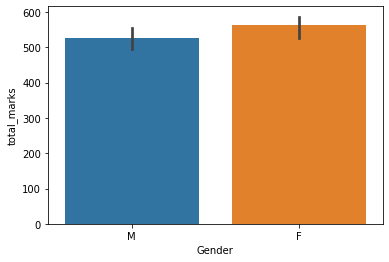

In [26]:
#lets see the male vs female students marks scoring in class
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=df["Gender"],y=df["total_marks"],data=df)
plt.show()

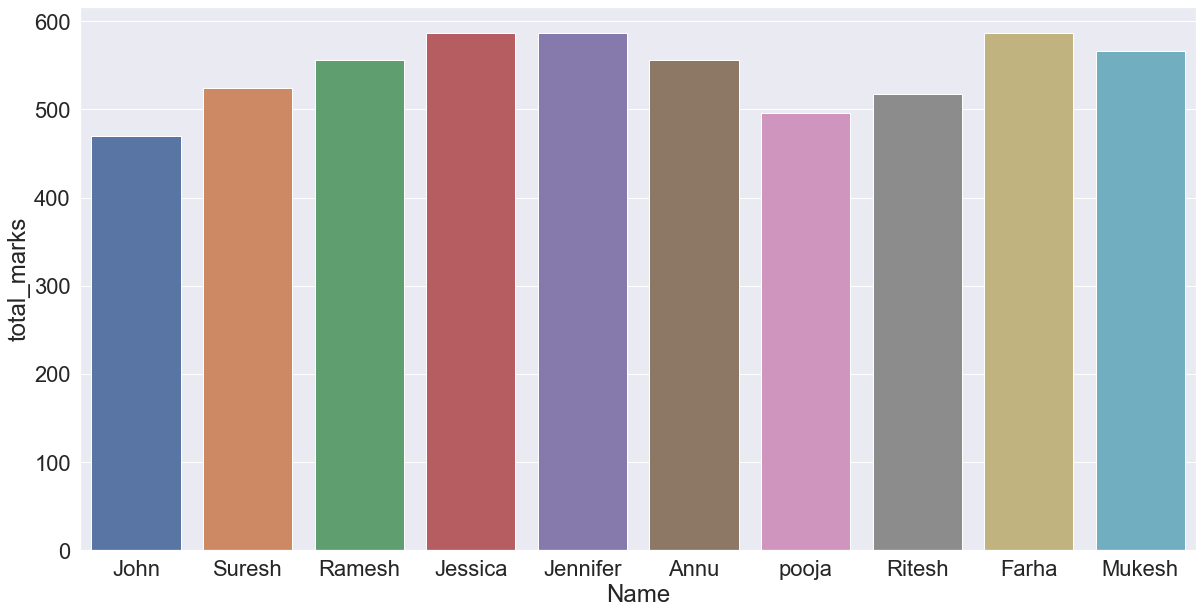

In [34]:
#lets compare the total marks of each student
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x=df["Name"],y=df["total_marks"],data=df)
plt.show()